<h2 style = "color:red" align = "center" > K-Means: Mall Segmentation </h2>

## About the problem

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

This project is a part of Mall Customer Segmentation Data competition held on Kaggle.

The goal of K means is to group data points into distinct non-overlapping subgroups. One of the major application of K means clustering is segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.

## About the dataset

The data includes the following features:

1. Customer ID

2. Customer Gender

3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)

5. Spending score of the customer (based on customer behaviour and spending nature)

## Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

### Read dataset

In [4]:
df = pd.read_csv('E:\Python\ML_Learn\K_means\Mail_segmentation\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Analysis

### Distribution of data

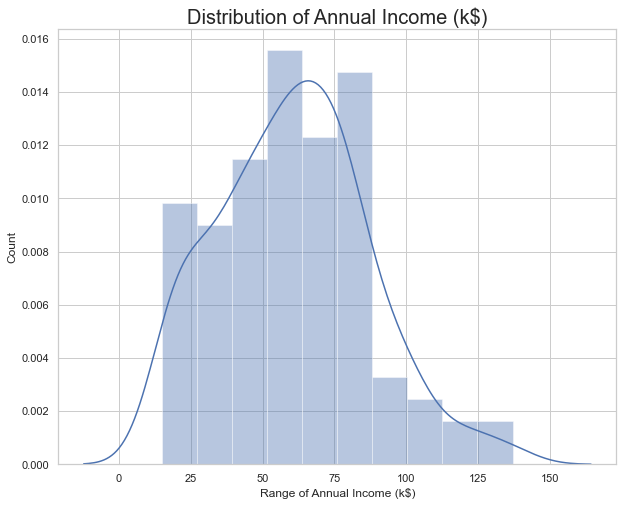

In [7]:
#Distribution of Annnual Income
fig = plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count');

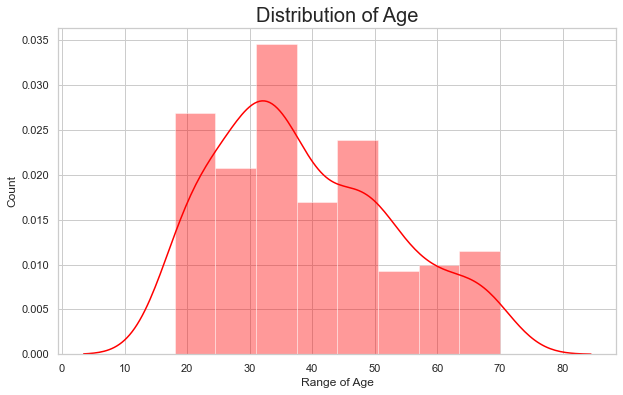

In [8]:
#Distribution of age

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'],color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count');

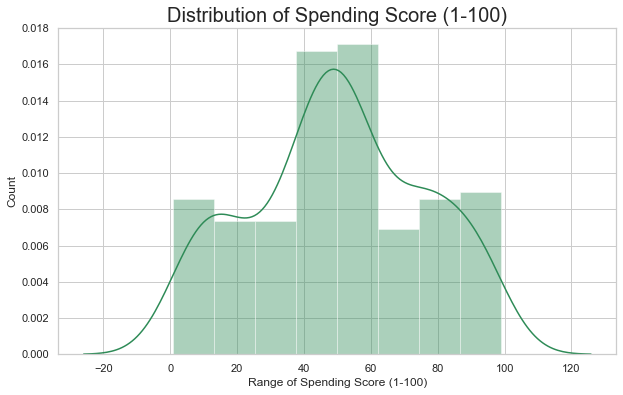

In [9]:
#Distribution of spending score

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'],color = 'seagreen')
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count');

### Gender Analysis

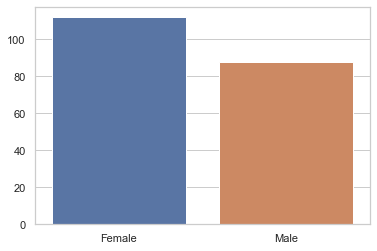

In [13]:
gender = df['Gender'].value_counts()
sns.barplot(x = gender.index,y = gender.values)
plt.show()

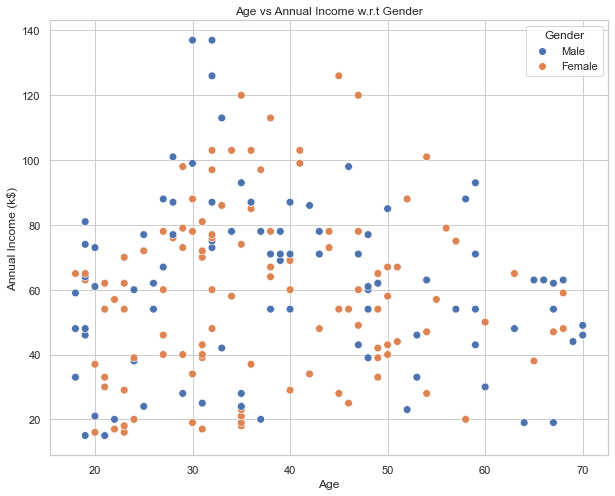

In [14]:
#Data distribution of gender and annual income
fig = plt.figure(figsize = (10,8))
sns.scatterplot(data = df, x = "Age", y ='Annual Income (k$)', hue = "Gender",s = 60)
plt.title('Age vs Annual Income w.r.t Gender')
plt.show()

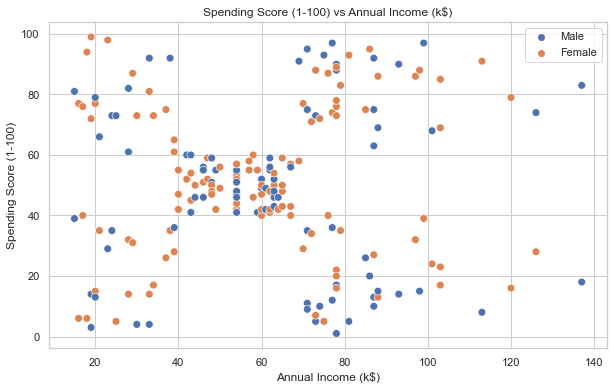

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)'  , hue="Gender",data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

### Age Buckets

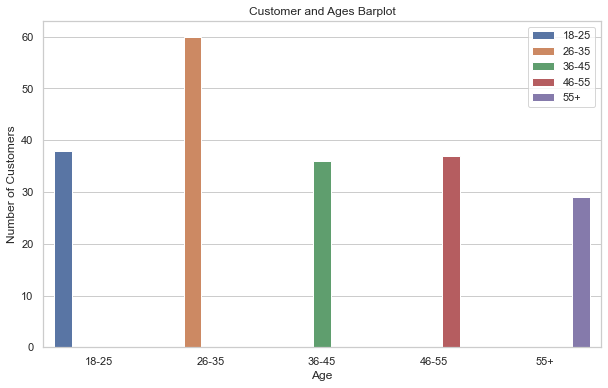

In [16]:
age18_25 = df.Age[(df['Age'] >= 18) & (df['Age'] <= 25)]
age26_35 = df.Age[(df['Age'] >= 26) & (df['Age'] <= 35)]
age36_45 = df.Age[(df['Age'] >= 36) & (df['Age'] <= 45)]
age46_55 = df.Age[(df['Age'] >= 46) & (df['Age'] <= 55)]
age55_ = df.Age[df['Age'] > 55]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25),len(age26_35),len(age36_45),len(age46_55),len(age55_)]
fig = plt.figure(figsize = (10,6))
sns.barplot(x = x,y = y, hue = x);
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

### Spending Score Buckets

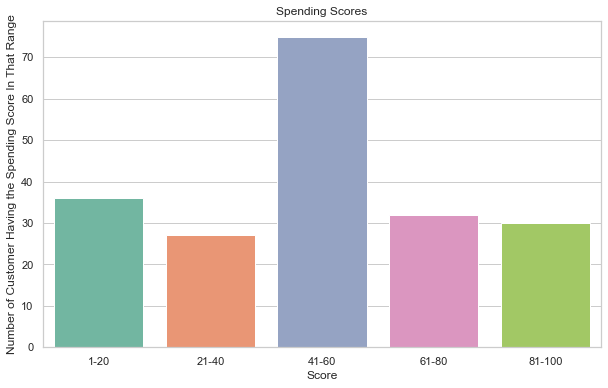

In [17]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Spending Score In That Range")
plt.show()

###  Annual Income (1000 USD)

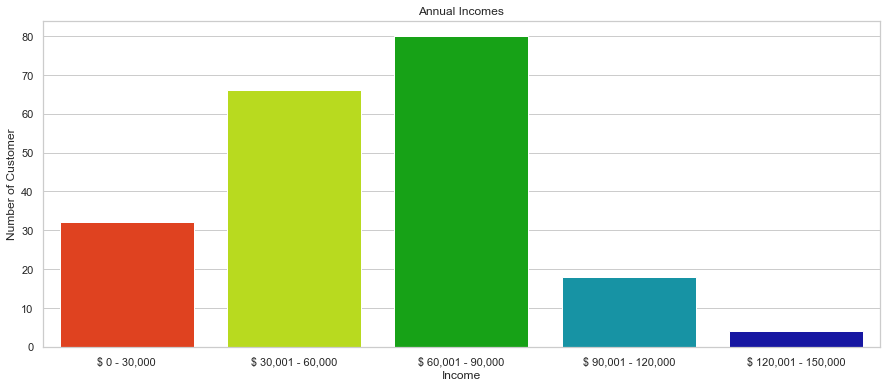

In [18]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

## Train model based on 2 features

In [32]:
df_train_first = df[["Annual Income (k$)","Spending Score (1-100)"]]
df_train_first

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


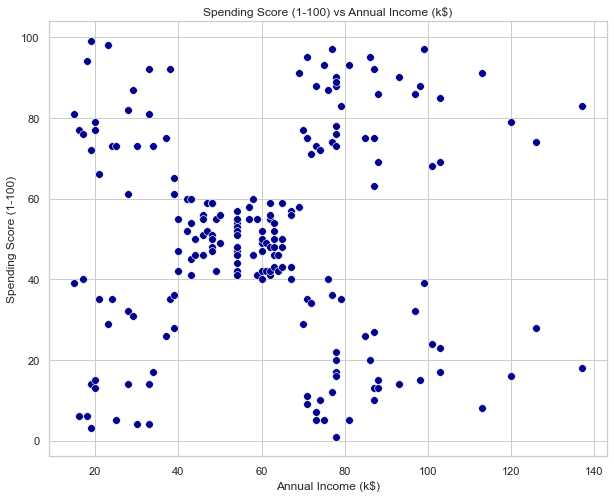

In [33]:
#Visualize data to find k
fig = plt.figure(figsize = (10,8))
sns.scatterplot(data = df_train_first, x = "Annual Income (k$)", y = "Spending Score (1-100)",s = 60,color = 'darkblue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()
#Look at this scatter plot, it's quite easy to know that we will seperate datapoints into 5 clusters

In [34]:
# Find value of k by Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range (1,21): #Test with 20 values of k
    k_means = KMeans(init = 'k-means++', n_clusters = i)
    k_means.fit(df_train_first)
    wcss.append(k_means.inertia_)

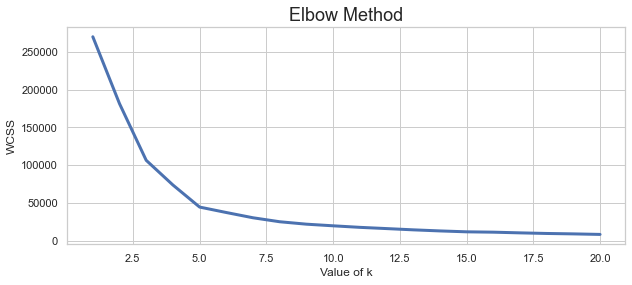

In [35]:
# Visualize elbow method to find best value of k
fig = plt.figure(figsize = (10,4))
sns.lineplot(x =np.linspace(1,20,20), y = wcss,linewidth = 3)
plt.title('Elbow Method',fontsize = 18)
plt.xlabel('Value of k')
plt.ylabel('WCSS')
plt.show()
# The elbow point is at k = 5, so choose k = 5 for training

In [36]:
#Train with k = 5
kmean = KMeans(init = 'k-means++', n_clusters = 5)
kmean.fit(df_train_first)

KMeans(n_clusters=5)

In [37]:
kmean.predict(df_train_first) # Label vector of training set

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [38]:
#Add label to dataset
df_train_first['Label'] = kmean.labels_
df_train_first

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


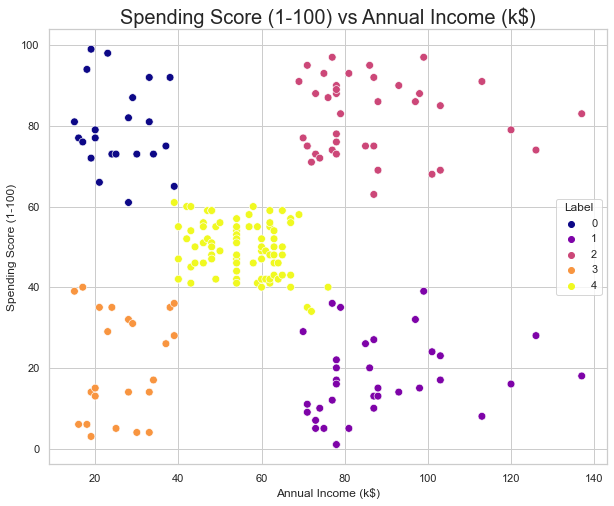

In [39]:
#Visualize result
fig = plt.figure(figsize = (10,8))
sns.scatterplot(data = df_train_first,x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)', hue = "Label",palette = plt.cm.plasma,s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)',fontsize = 20)
plt.show()

In [40]:
# Print customer cluster based on CustomerID
# Add label to initial dataset
df['Label'] = kmean.labels_
#Take a look at df
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


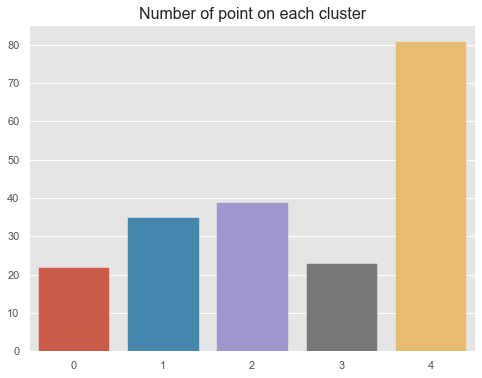

In [80]:
count_label = df['Label'].value_counts()
fig = plt.figure(figsize = (8,6))
sns.barplot(x = count_label.index, y = count_label.values);
plt.title('Number of point on each cluster',fontsize = 16);

In [42]:
def print_label(df,i):
    list = {1: 'st',2: 'nd', 3:'rd'}
    if i in list:
        clus = df[df['Label'] == i-1]
        print('Number of customer in {}{} group='.format(i,list[i]), len(clus))
        print('They are -', clus["CustomerID"].values)
        print("--------------------------------------------")
    else:
        clus = df[df['Label'] == i-1]
        print('Number of customer in {}th group='.format(i), len(clus))
        print('They are -', clus["CustomerID"].values)
        print("--------------------------------------------")
for i in range(1,6):
    print_label(df,i)

Number of customer in 1st group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 2nd group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 3rd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 4th group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customer in 5th group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  

## Train model based on 3 features

In [43]:
df_train_second = df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
df_train_second

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [44]:
#Taking the feature
df_train3 = df_train_second.drop(['CustomerID','Gender'],axis = 1)
df_train3

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


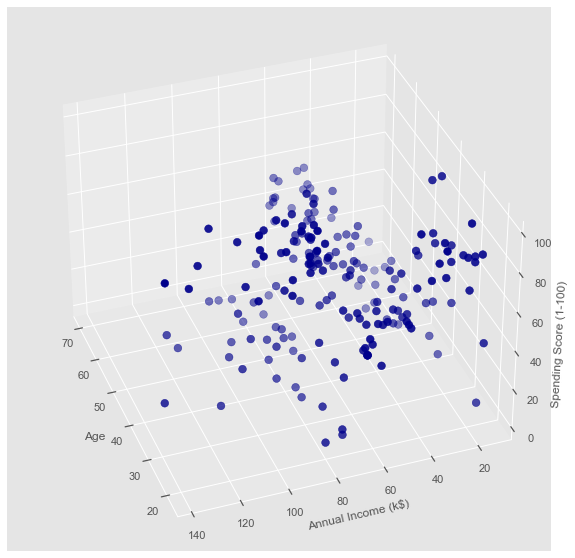

In [51]:
# Visualization before training
fig = plt.figure(figsize=(20,10))
plt.style.use('ggplot')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'],df['Annual Income (k$)'],df['Spending Score (1-100)'],s = 60, c = 'darkblue');
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.view_init(35,160)
plt.show()

In [65]:
#Training with various values of k to find best k
wcss_ = []
for k in range(1,21):
    k_mean3 = KMeans(init = "k-means++",n_clusters = k)
    k_mean3.fit(df_train3)
    wcss_.append(k_mean3.inertia_)

In [66]:
print(wcss_)

[308812.77999999997, 212840.16982097187, 143342.75157170597, 104366.15145556198, 75479.76429338777, 58300.44332159069, 51116.986944634315, 44307.87341670445, 40901.2569014319, 37806.048582810865, 34303.966902222935, 32384.330496292205, 30143.962579087576, 28363.504316040297, 26037.551336898392, 25137.687955465586, 23653.354473523552, 21456.93714338637, 20917.833424908426, 19639.631239348888]


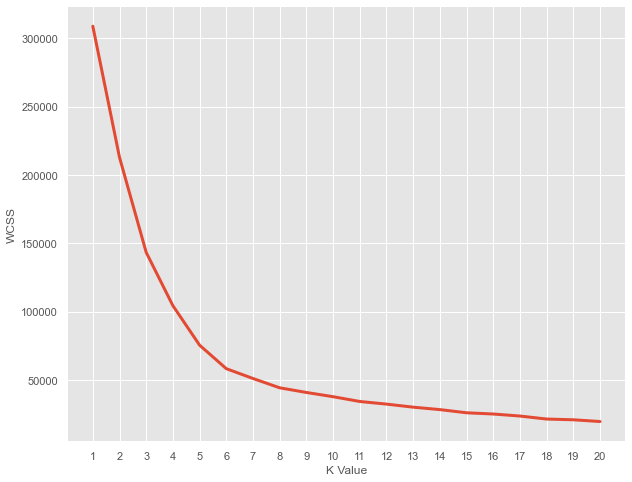

In [71]:
#Visualize Elbow
fig = plt.figure(figsize  = (10,8))
sns.lineplot(x = np.linspace(1,20,20), y = wcss_,linewidth = 3)
plt.xticks(np.arange(1,21));
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()
#Let's choose k = 6

In [92]:
# Train with k = 6
k_mean_3d = KMeans(init = "k-means++",n_clusters = 6)
k_mean_3d.fit(df_train3)

KMeans(n_clusters=6)

In [95]:
predict = k_mean_3d.predict(df_train3)
predict

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 4, 5, 0,
       2, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [75]:
#Add predict to columns of data train
df_train_second['Label'] = predict
df_train3['Label'] = predict
df_train_second

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,3
197,198,Male,32,126,74,4
198,199,Male,32,137,18,3


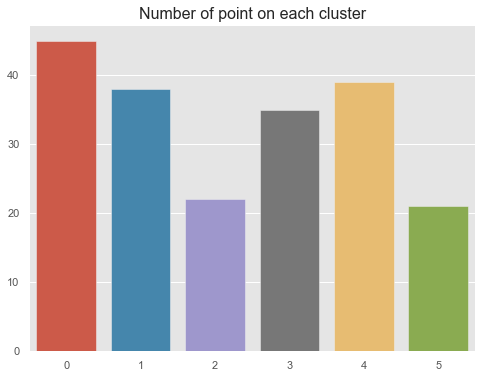

In [87]:
fig = plt.figure(figsize = (8,6))
count_label_3d = df_train_second['Label'].value_counts()
sns.barplot(x = count_label_3d.index, y = count_label_3d.values);
plt.title('Number of point on each cluster',fontsize = 16);

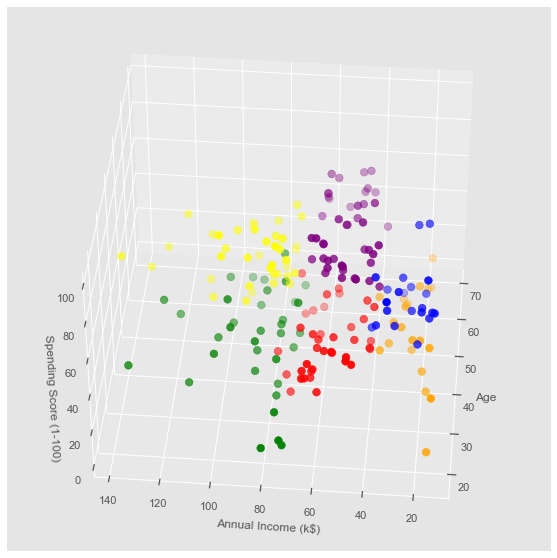

In [117]:
#3d plot 
fig = plt.figure(figsize=(20,10))
plt.style.use('ggplot')
ax = fig.add_subplot(1,1,1,projection = '3d')
colorlist = ['purple','red','blue','green','yellow','orange']
for i, col in zip(range(0,len(set(predict))),colorlist):
    ax.scatter(df_train_second.Age[df_train_second.Label == i],
               df_train_second['Annual Income (k$)'][df_train_second.Label == i],
               df_train_second['Spending Score (1-100)'][df_train_second.Label == i],s = 60,color = col)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.view_init(40, 185)
plt.show()

In [119]:
cust1=df_train_second[df_train_second["Label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df_train_second[df_train_second["Label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df_train_second[df_train_second["Label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df_train_second[df_train_second["Label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df_train_second[df_train_second["Label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")
cust6=df_train_second[df_train_second["Label"]==5]
print('Number of customer in 5th group=', len(cust6))
print('They are -', cust6["CustomerID"].values)
print("--------------------------------------------")


Number of customer in 1st group= 45
They are - [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]
--------------------------------------------
Number of customer in 2nd group= 38
They are - [ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 133 143]
--------------------------------------------
Number of customer in 3rd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 4th group= 35
They are - [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 5th group= 39
They are - [124 126 128 130 132 134 136 138 1

In [121]:
df_train_second['Label'].value_counts()

0    45
4    39
1    38
3    35
2    22
5    21
Name: Label, dtype: int64